

# **Making NASA’s Open-Innovation Data More Machine-Learning Friendly: A Case for the MAVEN Datasets**

## LURA Project 2020-2021


LURA Project Title: "Making NASA's Open-Innovation Data More Machine-Learning Friendly: A Case for the MAVEN Datasets" <br> This research grant was awarded by the Louisiana Space Grant Consortium (LaSPACE). URL: https://laspace.lsu.edu/about-us/. <br> Primary NASA Grant Number: 80NSSC20M0110.


Project Principal Investigator.: **Dr. Dhan Lord B. Fortela** <br> Apprentice Student: **Ashton C. Fremin** <br> Department of Chemical Engineering, University of Louisiana at Lafayette, URL: https://chemical.louisiana.edu/





---


## The MAVEN Spacecraft
MAVEN stands for 'Mars Atmosphere and Volatile EvolutioN'.

MAVEN is a spacecraft developed by NASA to investigate the upper atmosphere and ionosphere of Mars and how the solar wind strips volatile compounds from this atmosphere. This research gives insight into how the planet's climate has changed over time. Launch date: November 18, 2013, 12:28 PM CST. Mars Orbit Insertion: September 21, 2014. Mission Status: Currently Operating.

The MAVEN Spacecraft has the following instruments for science observation:
- Solar Energetic Particle (SEP)
- Solar Wind Ion Analyzer (SWIA)
- Solar Wind Electron Analyzer (SWEA)
- SupraThermal and Thermal Ion Composition (STATIC)
- Langmuir Probe and Waves (LPW)
- Neutral Gas and Ion Mass Spectrometer (NGIMS)

Visit the MAVEN webpage: https://mars.nasa.gov/maven/. Below is a video rendering of the MAVEN.

In [ ]:
# This code accesses the online videoclip. Click the 'play' arrow on the video to see the clip.
from IPython.display import HTML
HTML('<iframe width="560" height="560" src="https://mars.nasa.gov/layout/embed/model/?s=7&rotate=true" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')




---


## Notebook Overview (NGIMS Instrument):
This Jupyter Notebook focuses on the **NGIMS Instrument** observations.

This notebook is running Python and shows the step-by-step Machine Learning (ML) workflow from the download to the analysis of the MAVEN datasets.

The PyDIVIDE package is used to download the MAVEN datasets and to perform some graphical rendering of the raw data. It was created by the MAVEN Team at the University of Colorado - Boulder: https://github.com/MAVENSDC/Pydivide. It is mainly used in this project to download and read the datasets.

The SOMPY package is available from this GitHub repository: https://github.com/sevamoo/SOMPY.git. This package provides the funtional computations to perform the ML algorithm called Self-Organizing Map (SOM).




---


## Case Study Period: May 2018 to June 2018
In May to June of 2018, a series of dust storm events was observed on Mars. This period was chosen as the study period for the application of ML on the MAVEN datasets to elucidate any patterns on the atmospheric variables. Shown below is a videoclip provided by NASA. This video was acquired from the Mars Reconnaissance Orbiter's Mars Colour Imager (MARCI) camera. Visit the webpage through this URL: https://mars.nasa.gov/resources/21914/the-martian-dust-storm-of-june-2018/.

In [ ]:
# This code accesses the online videoclip. Click the 'play' arrow on the video to see the clip.
from IPython.display import HTML
HTML('<iframe width="560" height="560" src="https://mars.nasa.gov/embed/21914/" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')



---


## Install the packages not ready in Colab: PyDIVIDE & SOMPY

In [1]:
!pip install pydivide # no need to run if pydivide is already installed, just import (next code cell)
!pip install git+https://github.com/sevamoo/SOMPY.git # sompy python package

     |████████████████████████████████| 6.6 MB 8.1 MB/s 
     |████████████████████████████████| 1.7 MB 35.5 MB/s 
     |████████████████████████████████| 728 kB 45.4 MB/s 
     |████████████████████████████████| 959 kB 38.5 MB/s 
     |████████████████████████████████| 68 kB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 184 kB/s 
     |████████████████████████████████| 8.3 MB 25.4 MB/s 
     |████████████████████████████████| 229 kB 50.0 MB/s 
     |████████████████████████████████| 317 kB 46.3 MB/s 
     |████████████████████████████████| 59.9 MB 36 kB/s 
     |████████████████████████████████| 67.5 MB 34 kB/s 
  Created wheel for pydivide: filename=pydivide-0.2.16-py3-none-any.whl size=6594536 sha256=c0a907e87f691ce7b79ef56436a2968af34c1d719fe8883c561f56fd4ea350b4
  Stored in directory: /root/.cache/pip/wheels/2f/6a/00/f118b5e5203c339fad86d5c23377

  Cloning https://github.com/sevamoo/SOMPY.git to /tmp/pip-req-build-uxwlgo9_
  Running command git clone -q https://github.com/sevamoo/SOMPY.git /tmp/pip-req-build-uxwlgo9_
  Created wheel for SOMPY: filename=SOMPY-1.1.1-py3-none-any.whl size=29090 sha256=75e2338f850f22567bf336791f76a0bf1239b92e41d585aabfc3474c1f233fc7
  Stored in directory: /tmp/pip-ephem-wheel-cache-e91fghhl/wheels/8b/81/b8/f2f0b9e71a0be3b20bce8b0198151e55102565195482fb882c
Successfully built SOMPY


## Import the Python Packages:

In [2]:
import pydivide 
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
import sompy
import random
import io
import requests

## Import the MAVEN Data for the NGIMS instrument:

Import the MAVEN data available at the GitHub repository for the project. This notebook accesses the instrument dataset availabe as CSV file. Make sure to check the columns in the file and remove the time-date column before using the dataset for SOM training.


In [3]:
# This is the dataset stored in the GitHub repository for the project:
url = 'https://raw.githubusercontent.com/dhanfort/NASA-LURA-2020-dlbfortela/main/Data_NGIMS_csv.csv'
MAVEN_data_timeSeries = pd.read_csv(url)

Examine the structure of the data:

In [4]:
MAVEN_data_timeSeries.head() # checking the first few rows of the dataset

,Time,HE_DENSITY,O_DENSITY,CO_DENSITY,N2_DENSITY,AR_DENSITY,CO2_DENSITY,O2PLUS_DENSITY,CO2PLUS_DENSITY,NOPLUS_DENSITY,OPLUS_DENSITY,CO2PLUS_N2PLUS_DENSITY,CPLUS_DENSITY,OHPLUS_DENSITY,NPLUS_DENSITY
0,2018-05-15T03:35:24,185000.0,1920000,2560000,1380000,64200,448000,1160.0,113.0,91.9,777.0,106.0,11.7,61.8,16.8
1,2018-05-15T03:35:28,157000.0,2240000,2820000,1590000,88600,537000,1280.0,126.0,102.0,802.0,116.0,12.7,60.9,14.3
2,2018-05-15T03:35:32,133000.0,2520000,3100000,1840000,86300,616000,1490.0,137.0,118.0,776.0,125.0,13.9,51.9,14.2
3,2018-05-15T03:35:36,187000.0,2780000,3450000,2110000,98700,715000,1650.0,158.0,136.0,831.0,129.0,18.4,47.2,16.0
4,2018-05-15T03:35:40,150000.0,3040000,3830000,2390000,116000,835000,1790.0,181.0,146.0,789.0,127.0,16.0,41.7,18.0


Remove the Time column before using the data in the SOM. Time variable will be integrated back after the Clustering step.

In [5]:
MAVEN_data = MAVEN_data_timeSeries.drop(['Time'], axis='columns', inplace=False)
MAVEN_data.head()

,HE_DENSITY,O_DENSITY,CO_DENSITY,N2_DENSITY,AR_DENSITY,CO2_DENSITY,O2PLUS_DENSITY,CO2PLUS_DENSITY,NOPLUS_DENSITY,OPLUS_DENSITY,CO2PLUS_N2PLUS_DENSITY,CPLUS_DENSITY,OHPLUS_DENSITY,NPLUS_DENSITY
0,185000.0,1920000,2560000,1380000,64200,448000,1160.0,113.0,91.9,777.0,106.0,11.7,61.8,16.8
1,157000.0,2240000,2820000,1590000,88600,537000,1280.0,126.0,102.0,802.0,116.0,12.7,60.9,14.3
2,133000.0,2520000,3100000,1840000,86300,616000,1490.0,137.0,118.0,776.0,125.0,13.9,51.9,14.2
3,187000.0,2780000,3450000,2110000,98700,715000,1650.0,158.0,136.0,831.0,129.0,18.4,47.2,16.0
4,150000.0,3040000,3830000,2390000,116000,835000,1790.0,181.0,146.0,789.0,127.0,16.0,41.7,18.0


## Training the SOM on the dataset

Calculate the theorerical optimal map size of the SOM model. You need to specify as argument the lattice type ('rect' or 'hex').

In [6]:
map_size = sompy.SOMFactory().build(MAVEN_data.values).calculate_map_size('rect')
print("Optimal Map Size (row, column):" + str(map_size))

Optimal Map Size (row, column):[10, 88]


Train the SOM model. The map size calculated above is automtically used in the training. As the data is relatively large, the model takes some time to train.

In [7]:
%%time

## Retrieve the variable names.
component_names=list(MAVEN_data.columns)
print(component_names)

## Train the model with different parameters. The more, the better. 
som = sompy.SOMFactory().build(MAVEN_data.values, 
                                   mapsize=map_size,
                                   normalization = 'var', 
                                   initialization='random', 
                                   component_names=component_names, 
                                   lattice='rect')
som.train(n_job=1, train_rough_len=5, train_finetune_len=10) # change the number of iteration of rough_len and finetune _len


 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 30.000000 , radius_final: 5.000000, trainlen: 5



['HE_DENSITY', 'O_DENSITY', 'CO_DENSITY', 'N2_DENSITY', 'AR_DENSITY', 'CO2_DENSITY', 'O2PLUS_DENSITY', 'CO2PLUS_DENSITY', 'NOPLUS_DENSITY', 'OPLUS_DENSITY', 'CO2PLUS_N2PLUS_DENSITY', 'CPLUS_DENSITY', 'OHPLUS_DENSITY', 'NPLUS_DENSITY']


 epoch: 1 ---> elapsed time:  1.161000, quantization error: 8.281232

 epoch: 2 ---> elapsed time:  1.068000, quantization error: 2.683126

 epoch: 3 ---> elapsed time:  1.151000, quantization error: 2.075339

 epoch: 4 ---> elapsed time:  1.051000, quantization error: 1.818478

 epoch: 5 ---> elapsed time:  1.152000, quantization error: 1.577794

 Finetune training...
 radius_ini: 7.333333 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  1.153000, quantization error: 1.220352

 epoch: 2 ---> elapsed time:  1.153000, quantization error: 1.362728

 epoch: 3 ---> elapsed time:  1.050000, quantization error: 1.298878

 epoch: 4 ---> elapsed time:  1.053000, quantization error: 1.240178

 epoch: 5 ---> elapsed time:  1.051000, quantization error: 1.179655

 epoch: 6 ---> elapsed time:  1.058000, quantization error: 1.116361

 epoch: 7 ---> elapsed time:  1.050000, quantization error: 1.052027

 epoch: 8 ---> elapsed time:  1.152000, quantization error: 0.986396

 epoch

CPU times: user 19.3 s, sys: 16.9 s, total: 36.1 s
Wall time: 19.1 s


Calculate the SOM model Topographic error and Quantization error:

In [8]:
topographic_error = som.calculate_topographic_error()
quantization_error = som.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.11613403560926745
 Quantization error = 0.13868726262258915


## Results 

### Components plane 

The components map shows the values of the variables for each prototype and allows us to extract conclusions consisting of non-linear patterns between variables. We have represented 2 types of components maps.
- The **prototypes visualization**: it shows the patterns learned by the neural network which are used to determine de winning neuron of each training instance
- The **real visualization** with exogeneous variables: it shows the real average value of the components of each lattice element. This visualization should be used with 2 purposes: (i) compare it with the prototypes visualization to assess how good is the prototypes modeling and (ii) to add other exogeneous variables (those which have not been used to build the self organizing map) in order to study their relation with the endogeneous variables.

If the quantization error is not very high and a proper visual assessment has been done assuring that the prototypes and real visualizations look very alike, the prototypes visualization can be used as a final product, since it is much visual appealing.

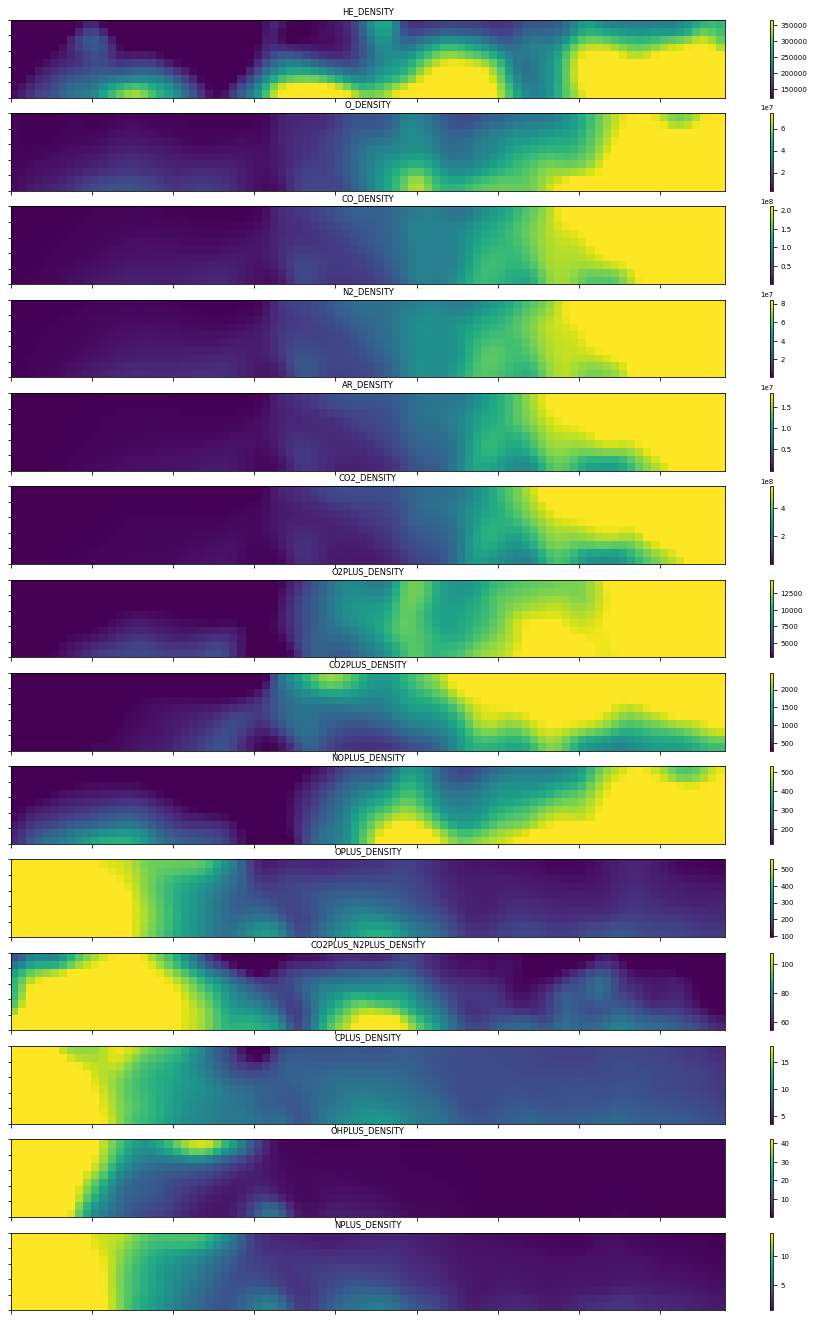

In [9]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(som, col_sz=1, which_dim="all", cmap='jet', denormalize=True)
plt.show()

Showing selected components. Select components by specifying the index in 'which_dim=[...]' argument.

TypeError: ignored

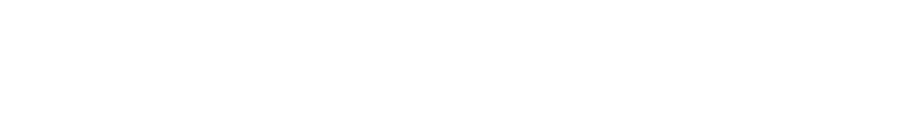

In [10]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(som, col_sz=1, which_dim=['SOLAR_WIND_ELECTRON_DENSITY'], cmap='viridis', denormalize=True)
plt.show()

### Hits-map 

This visualization is very important because it shows how the instances/observations/rawd ata are spreaded across the SOM lattice. The more instances lay into a cell, the more instances it is representing and hence the more we have to take it into acount.

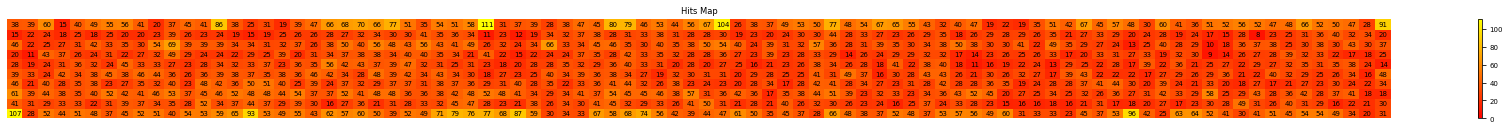

In [11]:
from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts  = BmuHitsView(31,59,"Hits Map",text_size=7)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

### Clustering 

This visualization helps us to focus on the data groups which share similar characteristics

/usr/local/lib/python3.7/dist-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


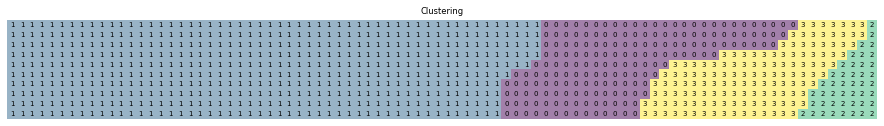

In [12]:
from sompy.visualization.hitmap import HitMapView
som.cluster(4)
map_labels=som.cluster(4)

hits  = HitMapView(30, 59,"Clustering",text_size=10, cmap=plt.cm.jet)
a=hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

Render the U-matrix of the SOM:

/usr/local/lib/python3.7/dist-packages/sompy/visualization/umatrix.py:123: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


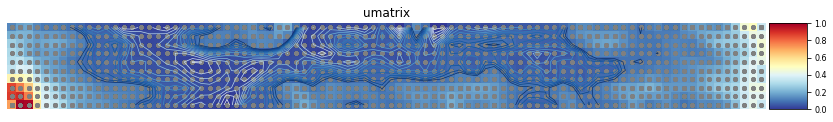

In [13]:
u = sompy.umatrix.UMatrixView(30, 59, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance=1, row_normalized=False, show_data=True, contour=True, blob=False)


Retrieveing the clustered data:

In [21]:
## Create a new dataframe of the Raw Data to add the BMU and Cluester to

MAVEN_data_SOM = MAVEN_data

## Retrieve the BMUs of each Raw Data

BMU=som._bmu[0]
MAVEN_data_SOM['BMU']=BMU
MAVEN_data_SOM.astype({'BMU': 'int64'}).dtypes


HE_DENSITY                float64
O_DENSITY                   int64
CO_DENSITY                  int64
N2_DENSITY                  int64
AR_DENSITY                  int64
CO2_DENSITY                 int64
O2PLUS_DENSITY            float64
CO2PLUS_DENSITY           float64
NOPLUS_DENSITY            float64
OPLUS_DENSITY             float64
CO2PLUS_N2PLUS_DENSITY    float64
CPLUS_DENSITY             float64
OHPLUS_DENSITY            float64
NPLUS_DENSITY             float64
BMU                         int64
dtype: object

In [22]:
## Creating a dictionary to relate Raw Data BMU to Cluster of the BMU:
keys_bmu = list(pd.Series(range(0,len(map_labels))))
values_clust =  list(map_labels)
bmu_clust = {keys_bmu[i]: values_clust[i] for i in range(len(keys_bmu))}
#print(len(keys_bmu))
#print(len(bmu_clust))
#print(len(values_clust))
#print(bmu_clust) #uncomment this to check the resulting dicitonary

Map the Cluster to the Raw Data using the BMU-Cluster dictionary above:

In [23]:
MAVEN_data_SOM['Cluster']=""
MAVEN_data_SOM['Cluster']=MAVEN_data_SOM['BMU'].map(bmu_clust)

MAVEN_data_SOM.head() #uncomment to check the resulting dataframe

,HE_DENSITY,O_DENSITY,CO_DENSITY,N2_DENSITY,AR_DENSITY,CO2_DENSITY,O2PLUS_DENSITY,CO2PLUS_DENSITY,NOPLUS_DENSITY,OPLUS_DENSITY,CO2PLUS_N2PLUS_DENSITY,CPLUS_DENSITY,OHPLUS_DENSITY,NPLUS_DENSITY,BMU,Cluster
0,185000.0,1920000,2560000,1380000,64200,448000,1160.0,113.0,91.9,777.0,106.0,11.7,61.8,16.8,96.0,1
1,157000.0,2240000,2820000,1590000,88600,537000,1280.0,126.0,102.0,802.0,116.0,12.7,60.9,14.3,184.0,1
2,133000.0,2520000,3100000,1840000,86300,616000,1490.0,137.0,118.0,776.0,125.0,13.9,51.9,14.2,273.0,1
3,187000.0,2780000,3450000,2110000,98700,715000,1650.0,158.0,136.0,831.0,129.0,18.4,47.2,16.0,360.0,1
4,150000.0,3040000,3830000,2390000,116000,835000,1790.0,181.0,146.0,789.0,127.0,16.0,41.7,18.0,361.0,1


## Discussion of Results

Now that we have clustered the Raw Data based on the trained SOM, we can now look into each group of data and discuss the patterns in each.

Graphical rendering of the variables in each cluster helps in examining the trends.

### Subset the Raw Data according to Cluster

Use now the original time-series MAVEN data and add the BMU and Cluster data columns:

In [24]:
# create a new DataFrame from the MAVEN-timeSeries
# this dedicated daraframe has the time-date, BMU and Cluster
MAVEN_data_timeSeries_SOM=MAVEN_data_timeSeries
MAVEN_data_timeSeries_SOM['BMU']=""
MAVEN_data_timeSeries_SOM['Cluster']=""

# add the BMU data column
MAVEN_data_timeSeries_SOM['BMU']=BMU

# map the Cluster to each raw data
MAVEN_data_timeSeries_SOM['Cluster']=MAVEN_data_timeSeries_SOM['BMU'].map(bmu_clust)

Create a dataframe for each Cluster:

In [25]:
Cluster_0 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([0])]
Cluster_1 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([1])]
Cluster_2 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([2])]
Cluster_3 = MAVEN_data_timeSeries_SOM[MAVEN_data_timeSeries_SOM["Cluster"].isin([3])]

# check the length(no. of observations) of each cluster:
print("Cluster 0 No. Obs.: " + str(len(Cluster_0)))
print("Cluster 1 No. Obs.: " + str(len(Cluster_1)))
print("Cluster 2 No. Obs.: " + str(len(Cluster_2)))
print("Cluster 3 No. Obs.: " + str(len(Cluster_3)))

Cluster 0 No. Obs.: 5973
Cluster 1 No. Obs.: 19395
Cluster 2 No. Obs.: 1470
Cluster 3 No. Obs.: 4109


In [ ]:
# make sure subsetting is corretcly done; check the 'Cluster' column data/last column
Cluster_2

,Time,HE_DENSITY,O_DENSITY,CO_DENSITY,N2_DENSITY,AR_DENSITY,CO2_DENSITY,O2PLUS_DENSITY,CO2PLUS_DENSITY,NOPLUS_DENSITY,OPLUS_DENSITY,CO2PLUS_N2PLUS_DENSITY,CPLUS_DENSITY,OHPLUS_DENSITY,NPLUS_DENSITY,BMU,Cluster
36,2018-05-15T03:37:48,280000.0,40700000,101000000,44100000,6540000,169000000,11700.0,1510.0,433.0,202.0,68.5,8.60,0.337,1.76,109.0,2
37,2018-05-15T03:37:52,270000.0,43300000,114000000,50700000,8220000,207000000,12200.0,1720.0,446.0,185.0,62.2,8.10,0.345,1.85,197.0,2
38,2018-05-15T03:37:56,245000.0,46400000,130000000,56400000,8920000,247000000,12200.0,1810.0,453.0,182.0,60.5,7.94,0.371,1.75,284.0,2
39,2018-05-15T03:38:00,216000.0,49900000,143000000,60300000,10800000,280000000,12300.0,1910.0,459.0,178.0,58.9,7.78,0.398,1.64,283.0,2
40,2018-05-15T03:38:04,238000.0,52700000,153000000,63100000,10900000,304000000,12300.0,2040.0,457.0,171.0,60.2,6.42,0.351,1.56,282.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30875,2018-06-28T21:22:48,394000.0,32400000,90200000,44500000,6390000,171000000,8050.0,1430.0,322.0,153.0,78.2,6.56,0.394,2.23,203.0,2
30876,2018-06-28T21:22:52,322000.0,30800000,90300000,43800000,6480000,176000000,7490.0,1420.0,295.0,133.0,73.4,5.23,0.276,2.30,379.0,2
30877,2018-06-28T21:22:56,336000.0,29000000,81700000,39000000,5790000,164000000,7330.0,1300.0,279.0,141.0,69.4,5.38,0.381,2.36,291.0,2
30878,2018-06-28T21:23:00,420000.0,27100000,70100000,33500000,4830000,137000000,7790.0,1300.0,290.0,146.0,73.8,6.39,0.603,2.20,203.0,2


### Using the variable "HE_DENSITY":


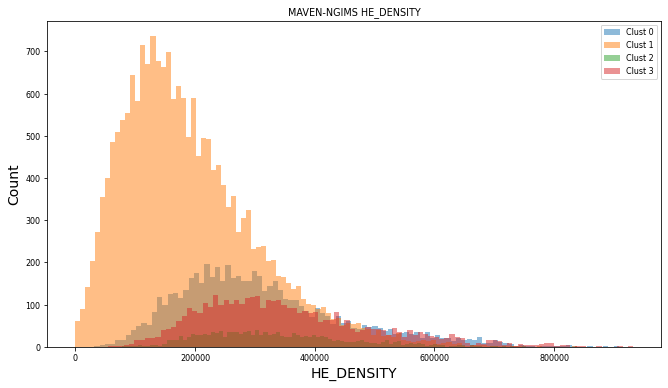

In [29]:
plt.figure(figsize=(11,6))
plt.hist(Cluster_0['HE_DENSITY'], bins=100, alpha=0.5, label="Clust 0")
plt.hist(Cluster_1['HE_DENSITY'], bins=100, alpha=0.5, label="Clust 1")
plt.hist(Cluster_2['HE_DENSITY'], bins=100, alpha=0.5, label="Clust 2")
plt.hist(Cluster_3['HE_DENSITY'], bins=100, alpha=0.5, label="Clust 3")

plt.xlabel("HE_DENSITY", size=14)
plt.ylabel("Count", size=14)
plt.title("MAVEN-NGIMS HE_DENSITY")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_NGIMS_HE_DENSITY.png") # graphics is in the Colab notebook folder


- Separating the histograms:

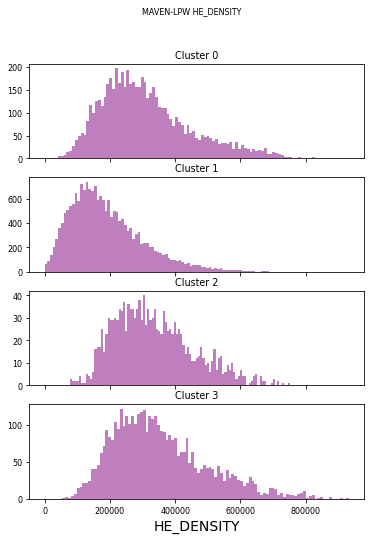

In [47]:
fig, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig.suptitle('MAVEN-LPW HE_DENSITY')
axs[0].hist(Cluster_0['HE_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Cluster_1['HE_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Cluster_2['HE_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Cluster_3['HE_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel("HE_DENSITY", size=14)

fig.savefig("separated_plots - MAVEN_NGIMS - HE_DENSITY.png") # graphics is in the Colab notebook folder

### Using the variable "O_DENSITY": 

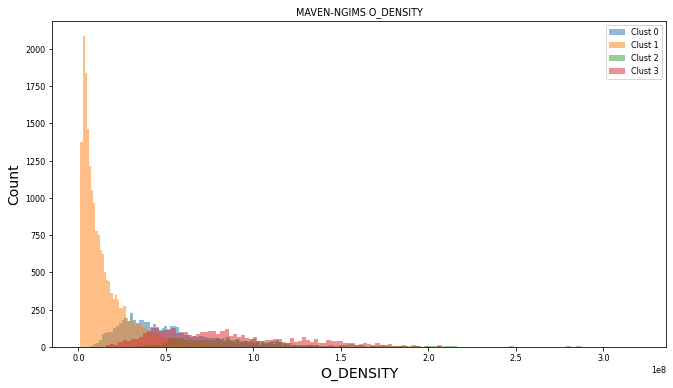

In [31]:
plt.figure(figsize=(11,6))
plt.hist(Cluster_0['O_DENSITY'], bins=100, alpha=0.5, label="Clust 0")
plt.hist(Cluster_1['O_DENSITY'], bins=100, alpha=0.5, label="Clust 1")
plt.hist(Cluster_2['O_DENSITY'], bins=100, alpha=0.5, label="Clust 2")
plt.hist(Cluster_3['O_DENSITY'], bins=100, alpha=0.5, label="Clust 3")

plt.xlabel("O_DENSITY", size=14)
plt.ylabel("Count", size=14)
plt.title("MAVEN-NGIMS O_DENSITY")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_NGIMS_O_DENSITY.png") # graphics is in the Colab notebook folder

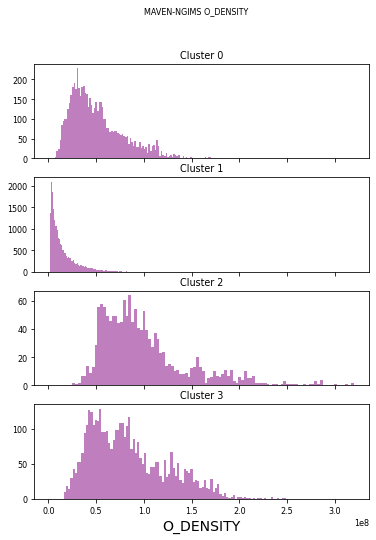

In [46]:
fig, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig.suptitle('MAVEN-NGIMS O_DENSITY')
axs[0].hist(Cluster_0['O_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Cluster_1['O_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Cluster_2['O_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Cluster_3['O_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel("O_DENSITY", size=14)

fig.savefig("separated_plots - MAVEN_NGIMS O_DENSITY.png") # graphics is in the Colab notebook folder

### Using the variable "CO_DENSITY": 

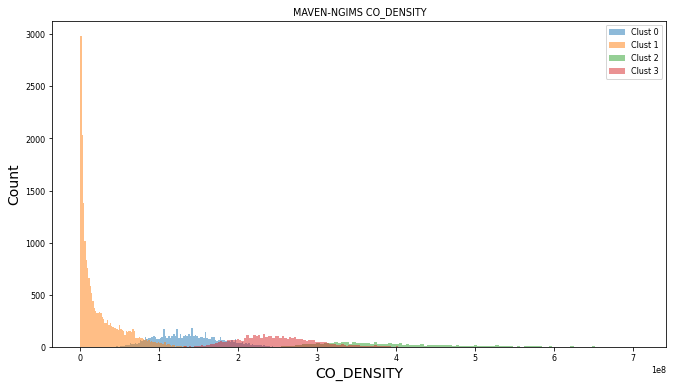

In [33]:
plt.figure(figsize=(11,6))
plt.hist(Cluster_0['CO_DENSITY'], bins=100, alpha=0.5, label="Clust 0")
plt.hist(Cluster_1['CO_DENSITY'], bins=100, alpha=0.5, label="Clust 1")
plt.hist(Cluster_2['CO_DENSITY'], bins=100, alpha=0.5, label="Clust 2")
plt.hist(Cluster_3['CO_DENSITY'], bins=100, alpha=0.5, label="Clust 3")

plt.xlabel("CO_DENSITY", size=14)
plt.ylabel("Count", size=14)
plt.title("MAVEN-NGIMS CO_DENSITY")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_NGIMS_CO_DENSITY.png") # graphics is in the Colab notebook folder

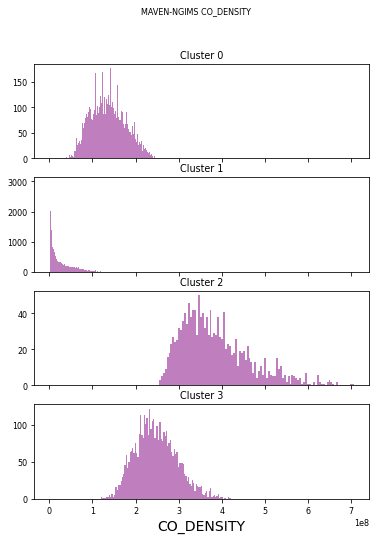

In [45]:
fig, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig.suptitle('MAVEN-NGIMS CO_DENSITY')
axs[0].hist(Cluster_0['CO_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Cluster_1['CO_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Cluster_2['CO_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Cluster_3['CO_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel("CO_DENSITY", size=14)

fig.savefig("separated_plots - MAVEN_NGIMS CO_DENSITY.png") # graphics is in the Colab notebook folder

### Using the variable "N2_DENSITY": 

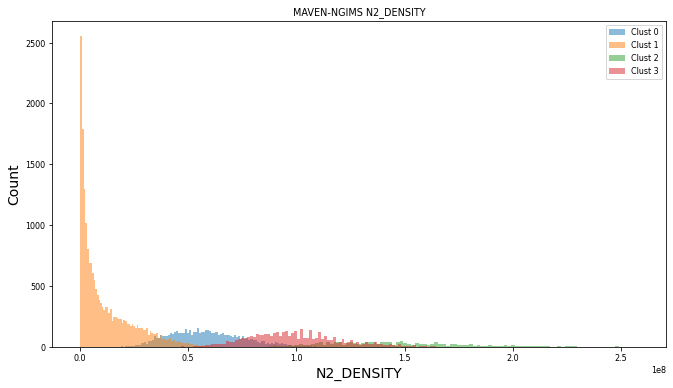

In [40]:
plt.figure(figsize=(11,6))
plt.hist(Cluster_0['N2_DENSITY'], bins=100, alpha=0.5, label="Clust 0")
plt.hist(Cluster_1['N2_DENSITY'], bins=100, alpha=0.5, label="Clust 1")
plt.hist(Cluster_2['N2_DENSITY'], bins=100, alpha=0.5, label="Clust 2")
plt.hist(Cluster_3['N2_DENSITY'], bins=100, alpha=0.5, label="Clust 3")

plt.xlabel("N2_DENSITY", size=14)
plt.ylabel("Count", size=14)
plt.title("MAVEN-NGIMS N2_DENSITY")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_NGIMS_N2_DENSITY.png") # graphics is in the Colab notebook folder

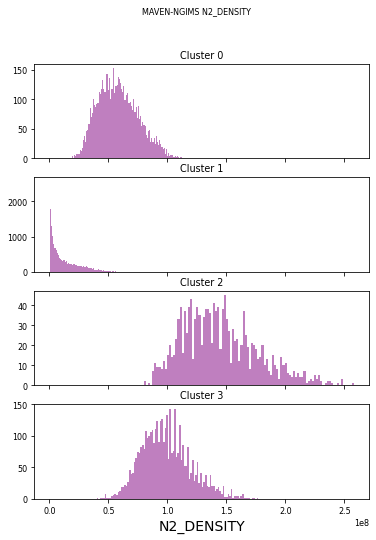

In [44]:
fig, axs = plt.subplots(4, sharex=True, sharey=False, figsize=(6,8))
fig.suptitle('MAVEN-NGIMS N2_DENSITY')
axs[0].hist(Cluster_0['N2_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 0")
axs[0].set_title('Cluster 0')
axs[1].hist(Cluster_1['N2_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 1")
axs[1].set_title('Cluster 1')
axs[2].hist(Cluster_2['N2_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 2")
axs[2].set_title('Cluster 2')
axs[3].hist(Cluster_3['N2_DENSITY'], bins=100, alpha=0.5, color='purple', label="Clust 3")
axs[3].set_title('Cluster 3')

plt.xlabel("N2_DENSITY", size=14)

fig.savefig("separated_plots - MAVEN_NGIMS N2_DENSITY.png") # graphics is in the Colab notebook folder

## Acknowledgments

We are grateful to LaSPACE and NASA for the research grant award. Visit LaSPACE website: https://laspace.lsu.edu//.

We are also thankful for the assistance of the LASP group in the use of the PyDIVIDE package and the MAVEN datasets. Visit LASP website: https://lasp.colorado.edu/home/.

In [ ]:
from IPython.display import HTML
HTML('<iframe width="400" height="270" src="https://faculty.lsu.edu/palardy/images/research/laspacelogo.jpg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [ ]:
HTML('<iframe width="560" height="300" src="https://laspace.lsu.edu//" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## References
NASA MAVEN: https://mars.nasa.gov/maven/

MAVEN Data Center: https://lasp.colorado.edu/maven/sdc/public/

PyDIVIDE Package:  https://github.com/MAVENSDC/Pydivide

SOM Package: https://github.com/sevamoo/sompy

